In [1]:
import os, json, sys, glob, random
packagePath = "/home/jovyan/data-vol-1/detreg_latest/_packages"
sys.path += [] if packagePath in sys.path else [packagePath]
import preprocess as pre

### Pretext data

In [10]:
imgFolderL = [\
                 "/home/jovyan/data-vol-2/recycling/Lab/train/2d/",\
                 "/home/jovyan/data-vol-2/recycling/Lab/test/2d/",\
                 "/home/jovyan/data-vol-2/recycling/Lab/test_v2_5classes//",\
                 "/home/jovyan/data-vol-2/recycling/Lab/train_v3/recycle_data_5/train/2d",\
                 "/home/jovyan/data-vol-2/recycling/Lab/train_v3/recycle_data_5/valid/2d",\
                 "/home/jovyan/data-vol-2/recycling/Lab/extra_data/label/",\
                 "/home/jovyan/data-vol-2/recycling/DF/0414/",\
                 "/home/jovyan/data-vol-2/recycling/backboneData/2022-06-14/",
                 "/home/jovyan/data-vol-2/recycling/backboneData/2022-06-16/",
                 "/home/jovyan/data-vol-2/recycling/backboneData/2022-06-21/",
             ]

obj = pre.PreparePretext(imgFolderL=imgFolderL[:], destName="60k")
#obj.checkShape()
#obj.removeInvalidShape()
obj.createPretextFolder()
obj.copy()

/home/jovyan/data-vol-2/recycling/Lab/train/2d/ 2295
/home/jovyan/data-vol-2/recycling/Lab/test/2d/ 3460
/home/jovyan/data-vol-2/recycling/Lab/test_v2_5classes// 3683
/home/jovyan/data-vol-2/recycling/Lab/train_v3/recycle_data_5/train/2d 20944
/home/jovyan/data-vol-2/recycling/Lab/train_v3/recycle_data_5/valid/2d 0
/home/jovyan/data-vol-2/recycling/Lab/extra_data/label/ 1100
/home/jovyan/data-vol-2/recycling/DF/0414/ 9852
/home/jovyan/data-vol-2/recycling/backboneData/2022-06-14/ 3145
/home/jovyan/data-vol-2/recycling/backboneData/2022-06-16/ 14383
/home/jovyan/data-vol-2/recycling/backboneData/2022-06-21/ 3119
total length = 61981
61981/61981
len(os.listdir(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/pretext/60k/ilsvrc100/train/2d))=59621


### Downsteam data

train, len(imgPrefixS)=20944, len(antPrefixS)=20951, len(self.trainPathL)=20944
val, len(imgPrefixS)=2803, len(antPrefixS)=2807, len(self.valPathL)=2803
test, len(imgPrefixS)=3673, len(antPrefixS)=3674, len(self.testPathL)=3673
20944/20944
self.trainClassD is created, summary: [('0', 14342), ('1', 1655), ('2', 16670), ('3', 9537), ('4', 3107)]
self.trainOutBoundS is created, summary: set()
2803/2803
self.valClassD is created, summary: [('0', 2347), ('1', 203), ('2', 2662), ('3', 1024), ('4', 107)]
self.valOutBoundS is created, summary: set()
3673/3673
self.testClassD is created, summary: [('0', 2501), ('1', 25), ('2', 2880), ('3', 771), ('4', 170)]
self.testOutBoundS is created, summary: set()
Auto balance each class to 9062 data as far as possible
26060/26060
self.trainClassD is created, summary: [('0', 9062), ('1', 9062), ('2', 9062), ('3', 9062), ('4', 7928)]
self.trainOutBoundS is created, summary: set()
len(self.trainPathL)=26060, len(set(self.trainPathL))=14896


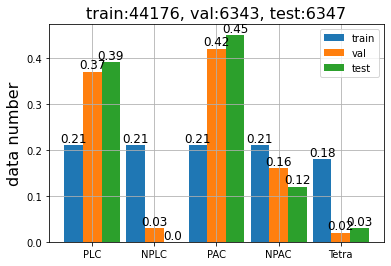

26060/26060
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3_balance/yolo_train/*.txt))=26021
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3_balance/yolo_train/*.jpg))=26020
2803/2803
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3_balance/yolo_val/*.txt))=2804
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3_balance/yolo_val/*.jpg))=2803
3673/3673
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3_balance/yolo_test/*.txt))=3674
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3_balance/yolo_test/*.jpg))=3673
26021/26021len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3_balance/voc_train/*.xml))=26020
2804/2804len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3_balance/voc_val/*.xml))=

In [3]:
# trainv3 # index start from 0
blackS = {"20220207_110849_058","20220207_110849_254","20220207_110849_458", "20220207_110849_653","20220207_110849_860","20220207_110850_060",\
          "20220207_110850_256","20220207_110850_456","20220207_110850_657","20220207_110850_855"}

obj = pre.PrepareDownstream(\
    trainImgFolder="/home/jovyan/data-vol-2/recycling/Lab/train_v3/recycle_data_5/train/2d",
    valImgFolder="/home/jovyan/data-vol-2/recycling/Lab/train_v3/recycle_data_5/valid/valid_2d/",
    testImgFolder="/home/jovyan/data-vol-2/recycling/Lab/test_v2_5classes",
    classesTxtPath="/home/jovyan/data-vol-2/recycling/Lab/train_v3/recycle_data_5/train/2d/classes.txt",
    blackS=blackS, classL=['PLC','NPLC','PAC','NPAC','Tetra'], destName="labv3_balance")
# obj.checkShape(["test"])
obj.checkClassesBounds(["train","val","test"])
obj.autoBalanceTrain()
obj.plotClassNum()
# obj.checkAspectArea()
# obj.show()
obj.showSpecific("/home/jovyan/data-vol-1/detreg_latest/_data/downstream/labv3/yolo_train/20211223_102413_231.jpg", \
                 "/home/jovyan/data-vol-1/detreg_latest/_data/downstream/labv3/yolo_train/20211223_102413_231.txt")
# obj.removeInvalidSet()
obj.copy()
obj.yolo2voc()
obj.voc2coco()

In [20]:
# labv3 index start 1
blackS = {"20220207_110849_058","20220207_110849_254","20220207_110849_458", "20220207_110849_653","20220207_110849_860","20220207_110850_060",\
          "20220207_110850_256","20220207_110850_456","20220207_110850_657","20220207_110850_855"}

obj = pre.PrepareDownstream(\
    trainImgFolder="/home/jovyan/data-vol-2/recycling/Lab/test_v2_5classes",
    valImgFolder="/home/jovyan/data-vol-2/recycling/Lab/test_v2_5classes",
    testImgFolder="/home/jovyan/data-vol-2/recycling/Lab/test_v2_5classes",
    classesTxtPath="/home/jovyan/data-vol-2/recycling/Lab/train_v3/recycle_data_5/train/2d/classes.txt",
    blackS=blackS, destName="labv3")
# obj.checkShape(["test"])
# obj.checkClassesBounds(["train","val","test"])
# obj.checkAspectArea()
# obj.show( *obj.trainPathL[0] )
# obj.removeInvalidSet()
obj.copy()
obj.yolo2voc()
obj.voc2coco()
obj.yolo2ap()

train, len(imgPrefixS)=3673, len(antPrefixS)=3674, len(self.trainPathL)=3673
val, len(imgPrefixS)=3673, len(antPrefixS)=3674, len(self.valPathL)=3673
test, len(imgPrefixS)=3673, len(antPrefixS)=3674, len(self.testPathL)=3673
3673/3673
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3/yolo_train/*.txt))=3674
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3/yolo_train/*.jpg))=3673
3673/3673
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3/yolo_val/*.txt))=3674
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3/yolo_val/*.jpg))=3673
3673/3673
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3/yolo_test/*.txt))=3674
len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data/downstream/labv3/yolo_test/*.jpg))=3673
3674/3674len(glob.glob(/home/jovyan/data-vol-1/detreg_latest/_packages/../_data

In [25]:
# c7 index start from 0
obj = pre.PrepareDownstream(valImgFolder="/home/jovyan/data-vol-2/recycling/0606DF/test_7classes/",\
                            classesTxtPath="/home/jovyan/data-vol-2/recycling/0606DF/test_7classes/classes.txt", destName="c7")
#obj.checkShape(["val"])
#obj.checkClassesBounds(["val"])
#obj.removeInvalidSet()
#obj.copy(["val"])
#obj.yolo2voc(["val"])
#obj.voc2coco(["val"])
#obj.yolo2ap("val")
if 0:
    srcFolder  = "/home/jovyan/data-vol-2/recycling/0606DF/train_7classes"
    destFolder = "../_data/downstream/c7/MSCoco" 
    #os.system(f"cp {srcFolder}/annotations/instances_train2017.json {destFolder}/annotations")
    #os.makedirs(f"{destFolder}/train2017", exist_ok=True)
    #os.system(f"cp -r {srcFolder}/train2017 {destFolder}")
    ! ls ../_data/downstream/c7/MSCoco/train2017/ | wc -l
    ! ls ../_data/downstream/c7/MSCoco/val2017/ | wc -l
    ! ls ../_data/downstream/c7/MSCoco/annotations/

train, len(imgPrefixS)=0, len(antPrefixS)=0, len(self.trainPathL)=0
val, len(imgPrefixS)=146, len(antPrefixS)=147, len(self.valPathL)=146
test, len(imgPrefixS)=0, len(antPrefixS)=0, len(self.testPathL)=0
29004
146
instances_train2017.json  instances_val2017.json


In [2]:
# c7 # 0620 index start from 0
obj = pre.PrepareDownstream(valImgFolder="/home/jovyan/data-vol-2/recycling/0620DF/20220616_7cls/",\
                            classesTxtPath="/home/jovyan/data-vol-2/recycling/0606DF/test_7classes/classes.txt", destName="c7_0620")
#obj.checkShape(["val"])
obj.checkClassesBounds(["val"])
#obj.removeInvalidSet()
#obj.copy(["val"])
#obj.yolo2voc(["val"])
#obj.voc2coco(["val"])
#obj.yolo2ap("val")
if 0:
    srcFolder  = "/home/jovyan/data-vol-2/recycling/0620DF/train_7classes"
    destFolder = "../_data/downstream/c7_0620/MSCoco"
    os.system(f"cp {srcFolder}/annotations/instances_train2017.json {destFolder}/annotations")
    os.system(f"cp -r {srcFolder}/train2017 {destFolder}")
    ! ls ../_data/downstream/c7_0620/MSCoco/train2017/ | wc -l
    ! ls ../_data/downstream/c7_0620/MSCoco/val2017/ | wc -l
    ! ls ../_data/downstream/c7_0620/MSCoco/annotations/

train, len(imgPrefixS)=0, len(antPrefixS)=0, len(self.trainPathL)=0
val, len(imgPrefixS)=1067, len(antPrefixS)=1068, len(self.valPathL)=1067
test, len(imgPrefixS)=0, len(antPrefixS)=0, len(self.testPathL)=0
1067/1067
self.valClassD is created, summary: [('0', 146), ('1', 54), ('2', 2115), ('3', 3306), ('4', 248), ('5', 11), ('6', 23)]
self.valOutBoundS is created, summary: set()
